In [1]:
# Load modules
import sys
sys.path.append('../mapplot/')
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import psyplot.project as psy
from timefunctions import *
import varfunctions
import datetime as dt

from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# Read in nc file

# If the nc file is missing grid information (no variables clon_bnds and clat_bnds),
# the information needs to be added with a grid file.
# The module "grid" contains a function to check if the grid information is available and a function to add it.

# Enter the path to your nc file or use one of the example datasets:
plotdate = dt.datetime(2019,9,13,8,30)
simdate = dt.datetime(2019,9,12,12,00)
lt = get_lt(plotdate,simdate)

print(lt)
filename = lfff_name(lt)
nc_file = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'+filename
# If necessary, add the corresponding grid file:
grid_file = '../data/example_data/grids/ICON-1E_DOM01.nc'

if iconvis.check_grid_information(nc_file):
    print('The grid information is available')
    data = psy.open_dataset(nc_file)
else:
    print('The grid information is not available')
    data = iconvis.combine_grid_information(nc_file,grid_file)

print(filename)

20.5
The grid information is available
lfff00203000.nc


In [3]:
# Check which variables are available
for var in data.variables:
    print(var)

time
clon
clon_bnds
clat
clat_bnds
height
height_2
depth
depth_bnds
depth_2
height_3
height_3_bnds
height_4
plev
plev_bnds
plev_2
plev_2_bnds
plev_3
plev_3_bnds
T_2M
qv_2m
u_10m
v_10m
alhfl_s
athb_s
athd_s
athu_s
ashfl_s
asob_s
asod_s
SKT
SMI
T_SO
PS
tot_prec
U
V
W
T
TKE
P
QV
QC
tqv
tqc
tqi
tqr
tqs
tqg
clc
clcl
clcm
clch
clct
fis
PMSL
RELHUM_2M
td_2m
tetfl_turb
thu_s
lwflx_up
lwflx_dn
sou_s
swflx_up
swflx_dn
shfl_s
lhfl_s


In [65]:
data.dims
data

<xarray.Dataset>
Dimensions:        (time: 1, ncells: 895688, vertices: 3, height: 1, height_2: 1, depth: 8, bnds: 2, depth_2: 9, height_3: 80, height_4: 81, plev: 1, plev_2: 1, plev_3: 1)
Coordinates: (12/19)
  * time           (time) datetime64[ns] 2019-09-13T08:30:00
    clon           (ncells) float32 0.01707 0.01716 0.01708 ... 0.264 0.2641
    clon_bnds      (ncells, vertices) float32 ...
    clat           (ncells) float32 0.8442 0.8443 0.8444 ... 0.8628 0.8629
    clat_bnds      (ncells, vertices) float32 ...
  * height         (height) float64 2.0
    ...             ...
  * plev           (plev) float64 800.0
    plev_bnds      (plev, bnds) float64 800.0 0.0
  * plev_2         (plev_2) float64 400.0
    plev_2_bnds    (plev_2, bnds) float64 400.0 800.0
  * plev_3         (plev_3) float64 0.0
    plev_3_bnds    (plev_3, bnds) float64 0.0 400.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/48)
    T_2M           (time, height, ncells) float64 ...
    qv_2m          (time, height, ncells) float64 ...
    u_10m          (time, height_2, ncells) float64 ...
    v_10m          (time, height_2, ncells) float64 ...
    alhfl_s        (time, ncells) float64 ...
    athb_s         (time, ncells) float64 ...
    ...             ...
    lwflx_dn       (time, height_4, ncells) float64 ...
    sou_s          (time, ncells) float64 ...
    swflx_up       (time, height_4, ncells) float64 ...
    swflx_dn       (time, height_4, ncells) float64 ...
    shfl_s         (time, ncells) float64 ...
    lhfl_s         (time, ncells) float64 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.4 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    uuidOfHGrid:          655488b8-6e60-ac09-a653-9b1ce37a2b20
    uuidOfVGrid:          60238ba9-873c-5324-e893-ae2041e72de0
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@147ed11ca55c4e...
    history:              /scratch/snx3000/swester/icon-nwp/cpu/bin/icon at 2...
    references:           see MPIM/DWD publications
    comment:              Stephanie Westerhuis, MCH (swester) on nid05424 (Li...

In [98]:
var_name = 'U' # name of variable
var_field = getattr(data,var_name)
var_dims = var_field.dims
print(var_dims)
values = var_field.values
if 'time' in var_dims:
    time = 0
    var = values[time,:,:]
else:
    var = values
height_ind = [i for i, s in enumerate(var_field.dims) if 'height' in s]
height_dim = var_field.dims[height_ind[0]]
height = getattr(data,height_dim).values[:]
print(height_dim)

('time', 'height_3', 'ncells')
height_3


In [123]:
time=0
lon = 11.622
lat = 47.305
lats = np.rad2deg(data.clat.values[:])
lons = np.rad2deg(data.clon.values[:])
ind = iconvis.ind_from_latlon(lats,lons,lat,lon,verbose=True)
var_names = ['U','V','T','QV','TKE','W']

for var in var_names:
    # get dict from dataset
    var_field = getattr(data,var_name)
    # get values only
    var = var_field.values
    # delete time dimension
    var = values[time,:,:]
    # reduce to 1 column
    var = var[:,ind]
var


Closest ind: 810552
 Given lat: 47.305 vs found lat: 47.307
 Given lon: 11.622 vs found lon: 11.620


array([ 1.67144985,  7.21336642,  8.01075902,  6.36989792,  9.4382968 ,
        6.58906956,  5.52863382,  9.87335794, 11.58000912, 12.7864908 ,
       12.00898668, 10.89433097,  9.78485493, 10.12886191, 11.00778333,
       11.21830488, 10.6245649 ,  9.85547332,  9.82117042,  9.64355845,
        9.43589695,  9.0465283 ,  8.87239319,  8.61836497,  8.35824761,
        8.36643782,  8.63789471,  8.46979153,  7.66870707,  6.84490852,
        6.22162396,  5.71894558,  5.31041113,  5.07158229,  4.97916313,
        5.01404552,  4.90411628,  4.69924901,  4.23078295,  3.60100506,
        2.73806618,  2.00826656,  1.43871752,  1.16917846,  1.16811128,
        1.30445694,  1.60414099,  1.86548494,  2.1512428 ,  2.41167121,
        2.58346301,  2.6312302 ,  2.51747921,  2.30850734,  2.04680667,
        1.82431908,  1.65691341,  1.58624627,  1.61860523,  1.71709151,
        1.85915343,  2.00829183,  2.10114251,  2.30832323,  2.47760961,
        2.58841981,  2.55030027,  2.53098345,  2.47546371,  2.37

In [122]:
lidar_data = {}
for var in var_names:
    lidar_data[var] = {} #np.empty(6)
time=0
for t in range(0,5):
    for var in var_names:
        lidar_data[var][t] = data[var][time,:,ind].data.squeeze()

lidar_data['height'] = data['height_3'].data.squeeze()

In [121]:
lidar_data

{'U': {0: array([ 1.67144985,  7.21336642,  8.01075902,  6.36989792,  9.4382968 ,
          6.58906956,  5.52863382,  9.87335794, 11.58000912, 12.7864908 ,
         12.00898668, 10.89433097,  9.78485493, 10.12886191, 11.00778333,
         11.21830488, 10.6245649 ,  9.85547332,  9.82117042,  9.64355845,
          9.43589695,  9.0465283 ,  8.87239319,  8.61836497,  8.35824761,
          8.36643782,  8.63789471,  8.46979153,  7.66870707,  6.84490852,
          6.22162396,  5.71894558,  5.31041113,  5.07158229,  4.97916313,
          5.01404552,  4.90411628,  4.69924901,  4.23078295,  3.60100506,
          2.73806618,  2.00826656,  1.43871752,  1.16917846,  1.16811128,
          1.30445694,  1.60414099,  1.86548494,  2.1512428 ,  2.41167121,
          2.58346301,  2.6312302 ,  2.51747921,  2.30850734,  2.04680667,
          1.82431908,  1.65691341,  1.58624627,  1.61860523,  1.71709151,
          1.85915343,  2.00829183,  2.10114251,  2.30832323,  2.47760961,
          2.58841981,  2.55030

In [68]:
# Get values of grid cell closest to coordinate
# E.g. Zürich:
lon = 11.622
lat = 47.305
lats = np.rad2deg(data.clat.values[:])
lons = np.rad2deg(data.clon.values[:])
ind = iconvis.ind_from_latlon(lats,lons,lat,lon,verbose=True)
var_coord = var[:,ind]


Closest ind: 810552
 Given lat: 47.305 vs found lat: 47.307
 Given lon: 11.622 vs found lon: 11.620


TypeError: unhashable type: 'slice'

In [49]:
import xarray
data_vars = {'temperature':(['height'], var_coord, 
                         {'units': 'K', 
                          'long_name':'Temperature'})}

# define coordinates
coords = {'height': (['height'], height)}
attrs = {'range': 'all', 
         'location':'Kolsass', 
         'lat':'47',
         'lon':'11'}

ds = xarray.Dataset(
    data_vars=data_vars, 
    coords=coords,
    attrs=attrs)

print(type(ds))

<class 'xarray.core.dataset.Dataset'>


In [62]:
# dimension time is same for 1 column
time=np.full(len(height),plotdate)

# variable = temperature 
data_vars = {'temperature':(('height','time'), var_coord)}
data_vars['temperature']
# # coordinates: height and time
# coords = {'height': height,
#             'time': time}

# ds = xarray.Dataset(
#     data_vars=data_vars,
#     coords=coords,
# )

(('height', 'time'),
 array([ 1.67144985,  7.21336642,  8.01075902,  6.36989792,  9.4382968 ,
         6.58906956,  5.52863382,  9.87335794, 11.58000912, 12.7864908 ,
        12.00898668, 10.89433097,  9.78485493, 10.12886191, 11.00778333,
        11.21830488, 10.6245649 ,  9.85547332,  9.82117042,  9.64355845,
         9.43589695,  9.0465283 ,  8.87239319,  8.61836497,  8.35824761,
         8.36643782,  8.63789471,  8.46979153,  7.66870707,  6.84490852,
         6.22162396,  5.71894558,  5.31041113,  5.07158229,  4.97916313,
         5.01404552,  4.90411628,  4.69924901,  4.23078295,  3.60100506,
         2.73806618,  2.00826656,  1.43871752,  1.16917846,  1.16811128,
         1.30445694,  1.60414099,  1.86548494,  2.1512428 ,  2.41167121,
         2.58346301,  2.6312302 ,  2.51747921,  2.30850734,  2.04680667,
         1.82431908,  1.65691341,  1.58624627,  1.61860523,  1.71709151,
         1.85915343,  2.00829183,  2.10114251,  2.30832323,  2.47760961,
         2.58841981,  2.550300

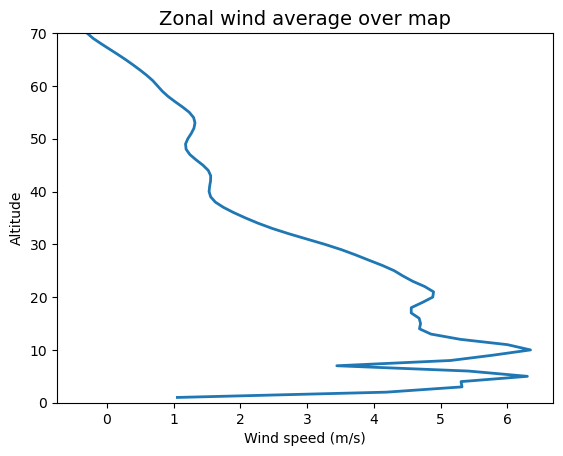

In [7]:
# Create plot of var_mean
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(var_mean, height, lw=2)
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Altitude')
ax.set_title('Zonal wind average over map', fontsize=14)
plt.ylim([0,70]);

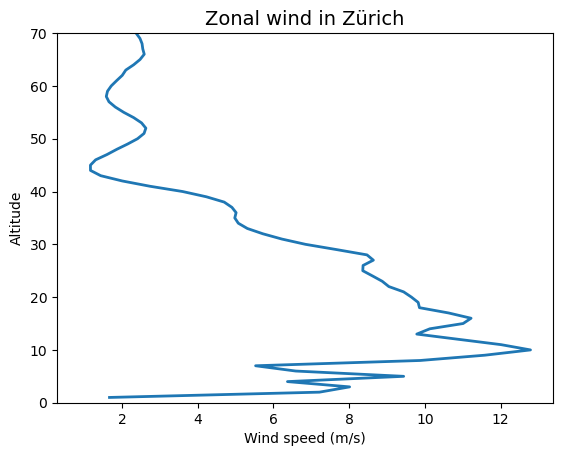

In [84]:
# Create plot of var_coord
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(ds.temperature, ds.height, lw=2)
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Altitude')
ax.set_title('Zonal wind in Zürich', fontsize=14)
plt.ylim([0,70]);
